# Hello CDH Tools

This is a basic example of using CDH tools to load data from the ADM datamart
and create some basic visualizations.

To run this first check out `cdhtools` from the GitHub repository https://github.com/pegasystems/cdh-datascientist-tools. Follow the link to the Wiki from the bottom of the page and find installation 
instructions there.

The code below assumes this notebook is run from the `extra` folder which is a sibbling of the
`python` folder. If you changed it, update the paths accordingly.

In [1]:
import sys
import os

import pandas as pd
import numpy as np

import sys
sys.path.append("../python")
from model_report import ModelReport
from cdh_utils import readDSExport

Then to run this example, export the dataset representing the ADM models from
Pega. These steps are detailed in that same Wiki, see [ADM Datamart](https://github.com/pegasystems/cdh-datascientist-tools/wiki/CDH-Model-analysis-from-ADM-Datamart).

Once you have exported and downloaded the data for the dataset
`Data-Decision-ADM-ModelSnapshot` continue the notebook from here.

Change the folder to your own download location.

The `readDSExport` function reads the download into a dataframe. It will take the latest
download zip from the given location. We then take only the latest snapshot as for this
example we're not interested in model evolution over time.

In [7]:
admModels = readDSExport("Data-Decision-ADM-ModelSnapshot_pyModelSnapshots", 
                         srcFolder="/Users/perdo/Downloads/")
admModels['pySnapshotTime'] = pd.to_datetime(admModels['pySnapshotTime'])

Data-Decision-ADM-ModelSnapshot_pyModelSnapshots_20210115T142521_GMT.zip


Create a ModelReport class instance called Models. To instantiate the class, use the parameters listed in the example below. Different reports, depending on how they are extracted, might have different column names. The class instance ensures that any file regardless of column name can be used.

In [3]:
Models = ModelReport(np.array(admModels['pyModelID']), np.array(admModels['pyName']), 
                     np.array(admModels['pyPositives']), np.array(admModels['pyResponseCount']), 
                     np.array(admModels['pyPerformance']), np.array(admModels['pySnapshotTime']))

## Bubble Chart

The following plot shows the bubble chart as shown on the Pega out-of-the-box model report landing page. The 
methods has options to zoom in into only certain channels/issues etc.

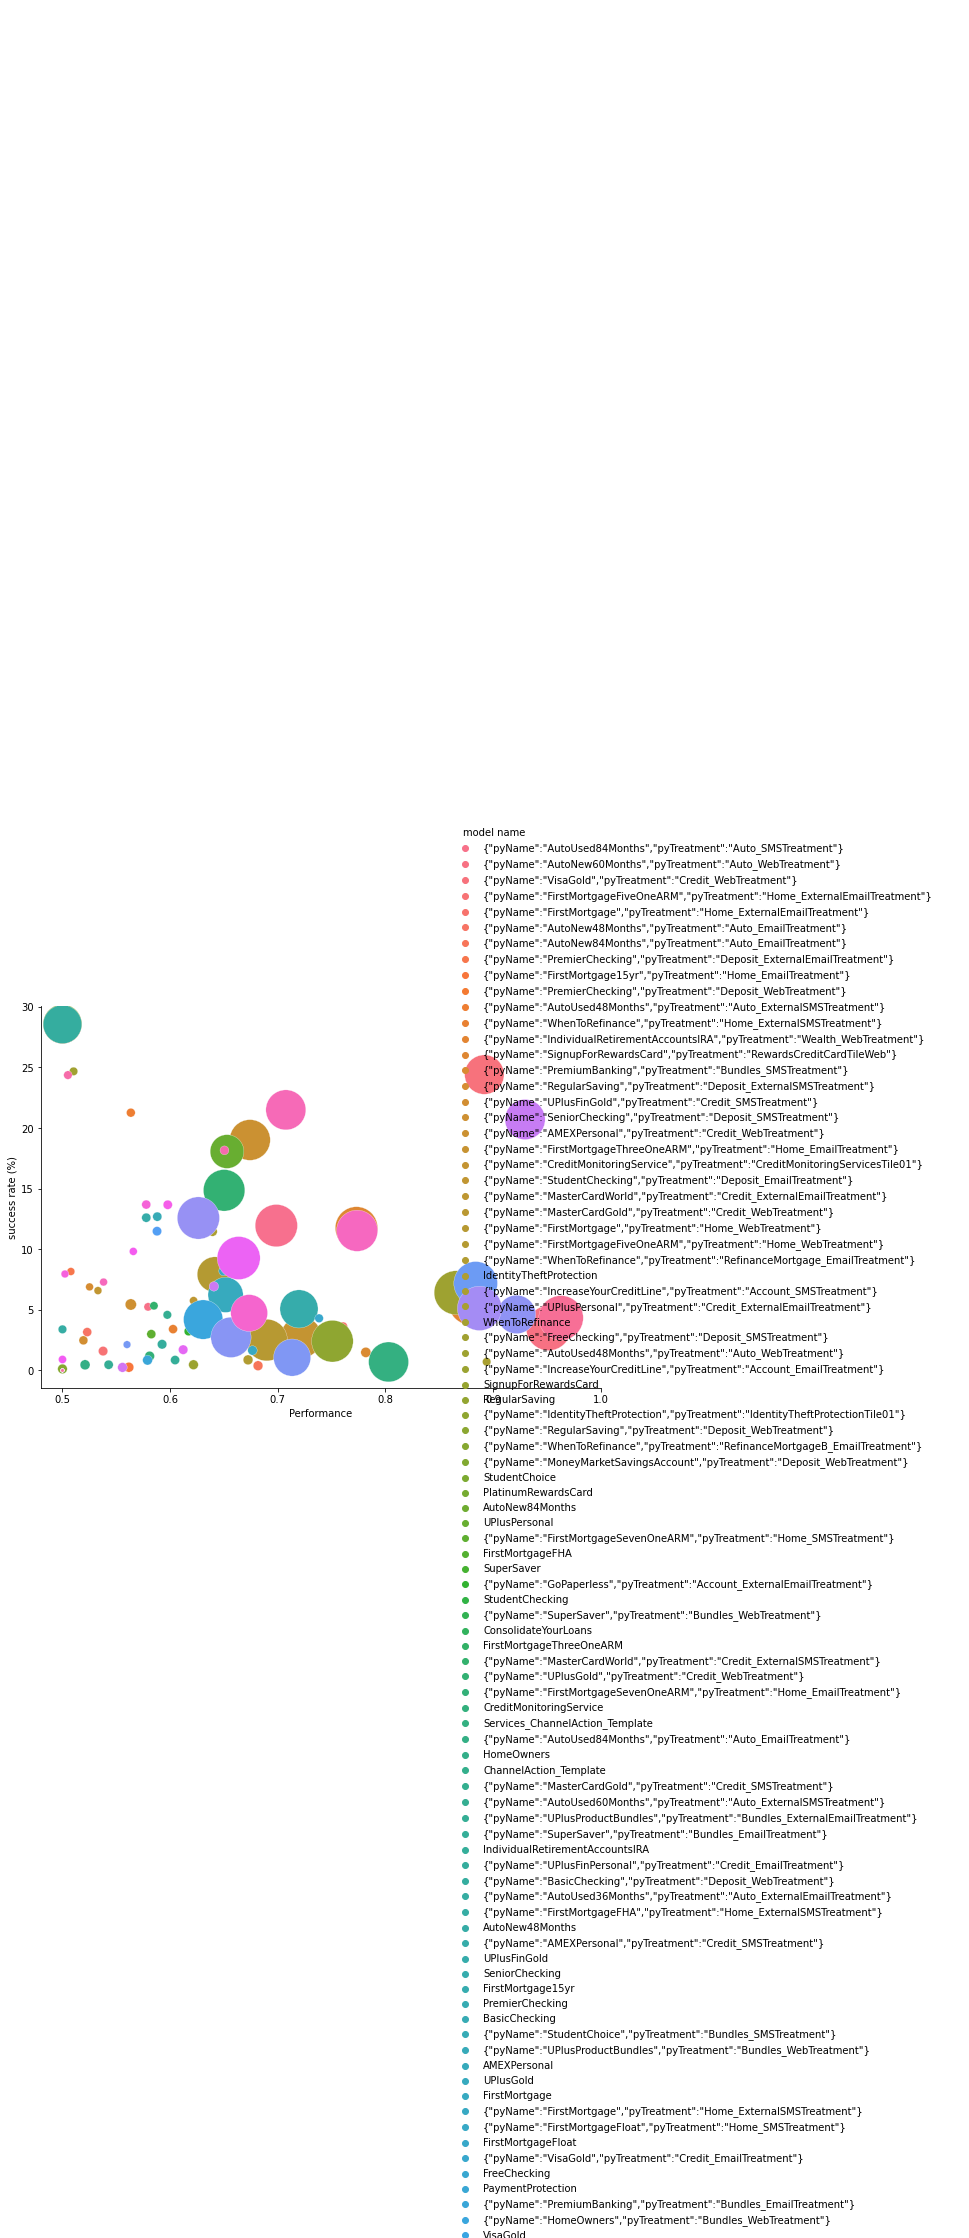

In [5]:
Models.show_bubble_chart()

## Next steps

For more examples and sample code please see the [CDH Tools Wiki](https://github.com/pegasystems/cdh-datascientist-tools/wiki).